#### Assumptions in multilinear regression
>1) **Linearity:** The relationship between predictors(X) and response(Y) is linear

>2) **Independence:** Observations are independent of each other

>3) **Homoscedasticity:** The residuals(y-y_hat) exhibit constant variance at all levels of predictor


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
print(cars.head())


   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


## Description
> **MPG:** milage of car(mile per gallon) (Y col to be predicted)

> **HP:** Horse power of car (x1 col)

> **VOL:** Volume of car (X2 column) 

> **SP:** Top spped of cars (miles per hour) (x3 col)

> **WT:** Weight of car (Pounds) (X4 col)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [5]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars.duplicated(keep=False)

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

<Axes: xlabel='HP', ylabel='Count'>

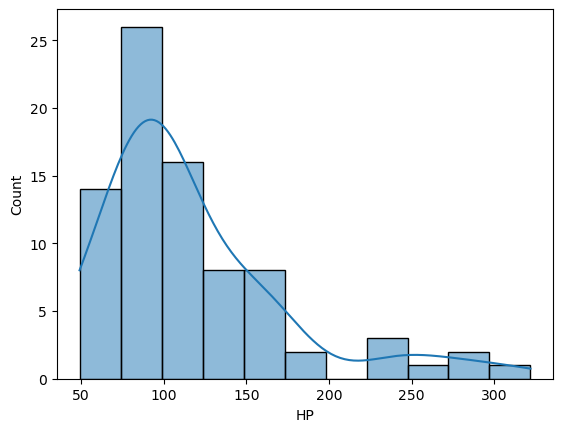

In [7]:
sns.histplot(cars["HP"],kde=True)

<Axes: xlabel='MPG', ylabel='Count'>

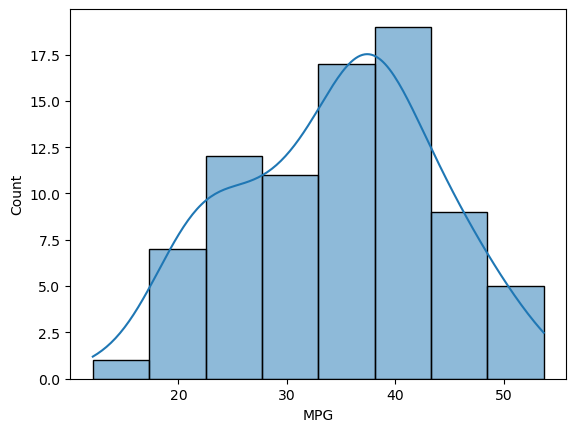

In [8]:
sns.histplot(cars["MPG"],kde=True)

<Axes: xlabel='VOL', ylabel='Count'>

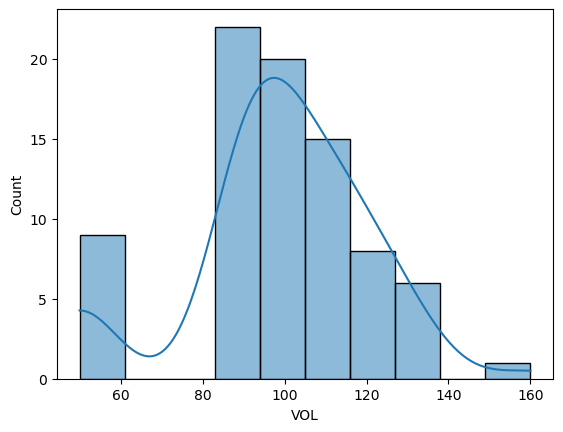

In [9]:
sns.histplot(cars["VOL"],kde=True)

<Axes: xlabel='SP', ylabel='Count'>

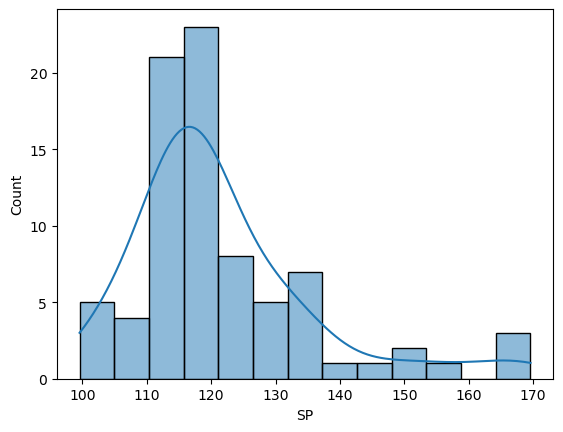

In [10]:
sns.histplot(cars["SP"],kde=True)

<Axes: xlabel='WT', ylabel='Count'>

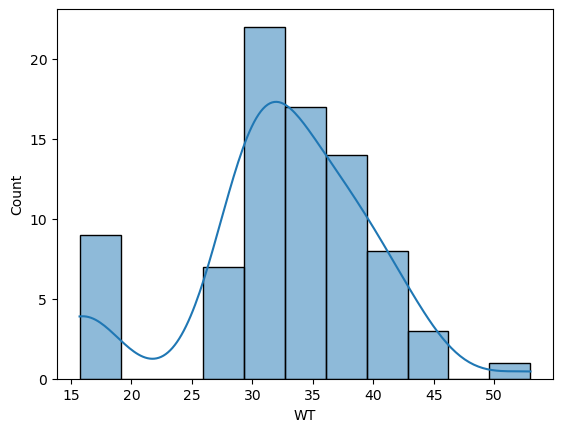

In [11]:
sns.histplot(cars["WT"],kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e6dbdd66f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e6dbf3b350>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e6dbf3acf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e6dbf3b8c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e6dbf3bb90>],
 'means': []}

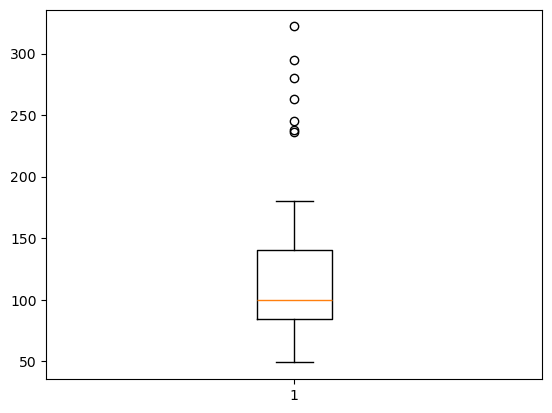

In [12]:
plt.boxplot(cars["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e6dbfccf50>,
 'caps': [<matplotlib.lines.Line2D at 0x2e6dbfcd4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e6dbfcce00>],
 'medians': [<matplotlib.lines.Line2D at 0x2e6dbfcd9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e6dbfcdc40>],
 'means': []}

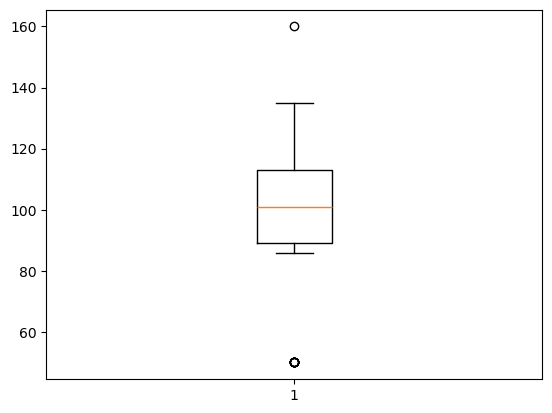

In [13]:
plt.boxplot(cars["VOL"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e6dbfcf110>,
 'caps': [<matplotlib.lines.Line2D at 0x2e6dc00f200>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e6dc00f080>],
 'medians': [<matplotlib.lines.Line2D at 0x2e6dc00f770>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e6dc00f9e0>],
 'means': []}

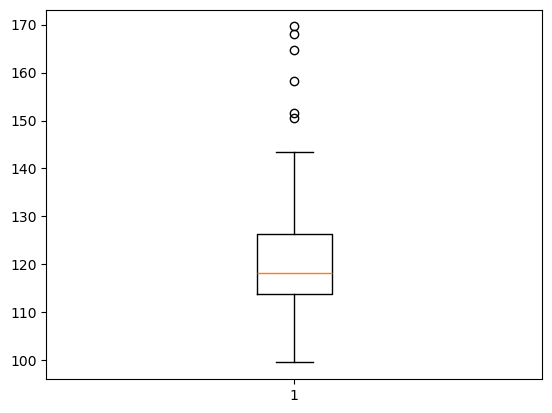

In [14]:
plt.boxplot(cars["SP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e6dbffa2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e6dbffa7b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e6dbffa090>],
 'medians': [<matplotlib.lines.Line2D at 0x2e6dbffac30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e6dbffaed0>],
 'means': []}

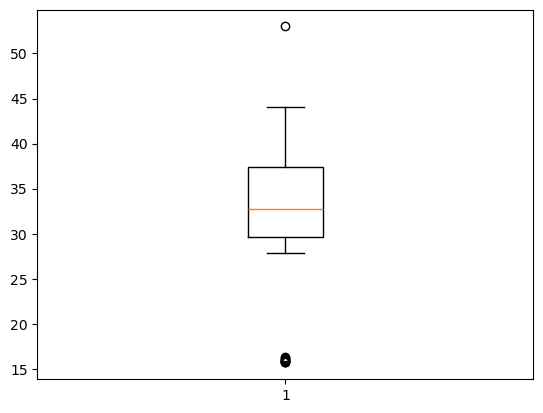

In [15]:
plt.boxplot(cars["WT"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e6dc0eda60>,
 'caps': [<matplotlib.lines.Line2D at 0x2e6dc0edfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e6dc0ed790>],
 'medians': [<matplotlib.lines.Line2D at 0x2e6dc0ee5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e6dc0ee840>],
 'means': []}

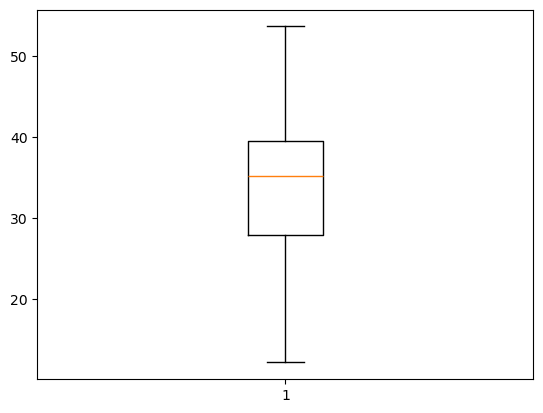

In [16]:
plt.boxplot(cars["MPG"])

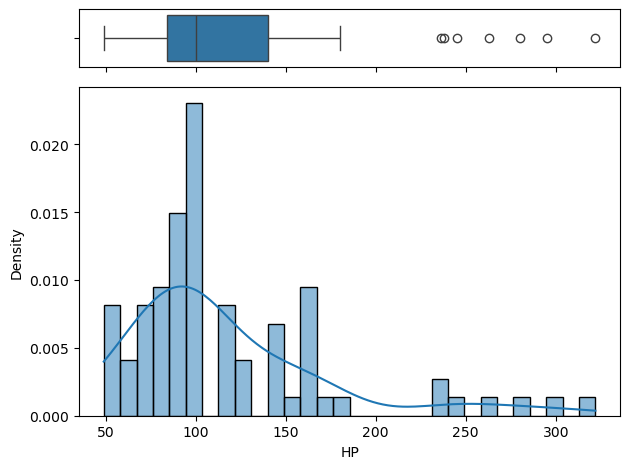

In [18]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

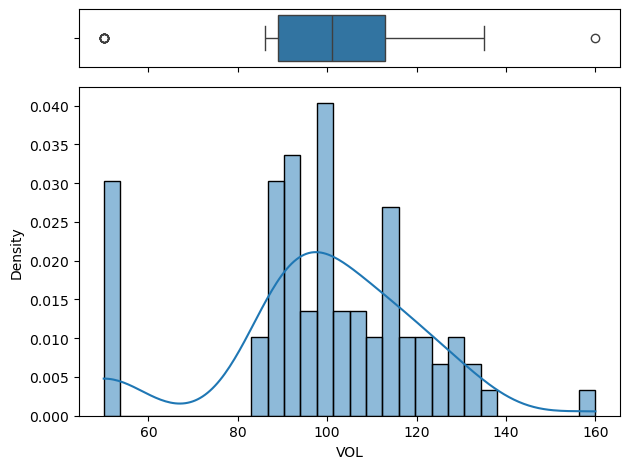

In [19]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='VOL',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='VOL',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

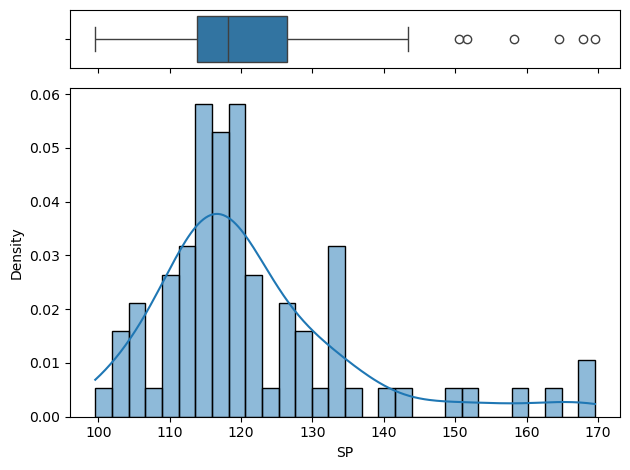

In [20]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='SP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='SP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

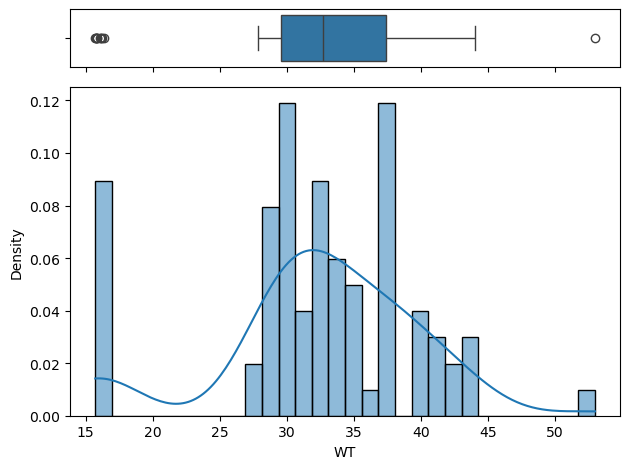

In [21]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='WT',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='WT',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

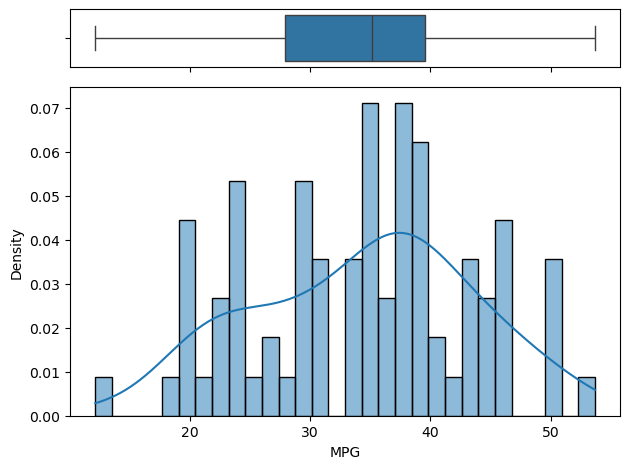

In [22]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='MPG',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='MPG',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

#### Observations from boxplot and hu=istograms
> There ae some extreme values(outliers) observed in towards the right tail of SP and HP distributions
 
> In VOL and WT columns, a few outliers are obderves in both tails of their distributions

> The extreme values of cars data may have come from the soecially designed nature of cars

> As this is multidimensional dataa the outliers with respect to spatial dimendsions may have to be considered while building regression model 





In [26]:
# Checking for duplicated rows
cars[cars.duplicated(keep=False)]

,HP,MPG,VOL,SP,WT


In [27]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


#### Observations:
> `VOL` and `WT` have highest positive correlation of value=**0.999203**

> `SP` and `HP` have second highest positive correlation of value=**0.973848**

> `WT` and `HP` has Least positive correlation of value=**0.076513**

> `MPG` and `HP` have highest negative correlation of value= **-0.725038**
